In [1]:
from environment import truly_dynamic_environment, replay, visualize
from agent_heuristic_owen import heurisitic_agent

from agent_pmcs_owen_fast import PMCSAgent
import numpy as np


# examples as class
class RandomAgent1:
    def agent_function(board, player): 
        """A random agent."""
        return np.random.choice(np.where(board[0]==0)[0])

# example as function
def random_agent2(board, player): 
    """Another random agent."""
    return np.random.choice(np.where(board[0]==0)[0])

pmcs_agent = PMCSAgent(inc=2000)

players = [
    {
        "algo": heurisitic_agent,
        "name": "heurisitic_agent1",
        "player": +1,
        "args": {"cutoff": 8}
    },
    {
        "algo": pmcs_agent.act,
        "name": "pmcs_agent",
        "player": -1,
        "args": {}
    }
]

Run the game

pmcs_agent took a total of 98.135 seconds
heurisitic_agent1 took a total of 43.89 seconds
The winner is heurisitic_agent1 (-1)
Turns Taken: 29


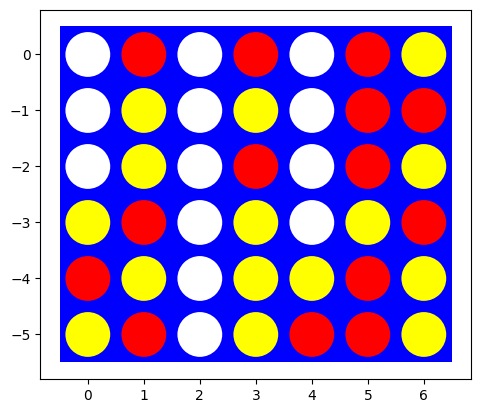

defaultdict(int, {'pmcs_agent': 2, 'heurisitic_agent1': 2})

In [2]:
from collections import defaultdict
import json
runs = []
winner = defaultdict(int)
for _ in range(4):
    result,final_board,all_boards = truly_dynamic_environment(players, size=(6,7), visual=True)
    runs.append((result,final_board,all_boards))
    visualize(final_board)
    if result['winner'] == 1: 
        winner[players[0]['name']] += 1
    elif result['winner'] == -1:
        winner[players[1]['name']] += 1
    else:
        winner["draw"] += 1
    with open('result.json', 'w') as jfile:
        json.dump(winner, jfile)
    players[0], players[1] = players[1], players[0]
    
winner

In [ ]:
res = 0
for run in runs:
    if list(run[0]["algo_info"].keys())[0] == "pmcs_agent" and run[0]['winner'] == 1:
        res += 1
    if list(run[0]["algo_info"].keys())[1] == "pmcs_agent" and run[0]['winner'] == -11:
        res += 1
res

1

In [ ]:
result,final_board,all_boards = truly_dynamic_environment(players, size=(6,7), visual=True)

visualize(final_board)

KeyboardInterrupt: 

Slow replay

In [ ]:
sum(sum(runs[i][0]['algo_info']['pmcs_agent']['time'])/1000 for i in range(5)) / 5

123.40948654006934

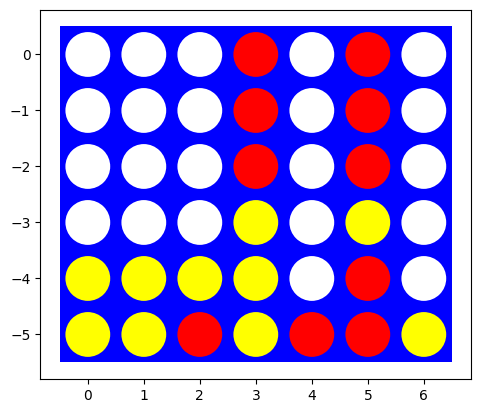

In [ ]:
replay(runs[0][2])